In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [17]:
data = tf.keras.datasets.cifar10.load_data()
(train_data, train_label),(test_data, test_label) = data
print(train_data.shape, train_label.shape)
print(test_data.shape, test_label.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [18]:
label = ["airplane",    "automobile",   "bird",     "cat",  "deer",
         "dog",         "frog",         "horse",    "ship", "truck"]

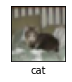

In [19]:
idx = 150
plt.figure(figsize=(1,1))
plt.imshow(train_data[idx])
plt.xlabel(label[train_label[idx][0]])
plt.xticks([])
plt.yticks([])
plt.show()

In [24]:
y_train = tf.keras.utils.to_categorical(train_label,10)
y_test = tf.keras.utils.to_categorical(test_label,  10)
x_train = train_data/255.0
x_test = test_data/255.0

In [25]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [27]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(input_shape=(32,32,3),filters=32,
                                 kernel_size=(5,5),strides=(2,2),padding="same", kernel_initializer="he_uniform",
                                 activation=tf.keras.activations.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(filters=32,
                                 kernel_size=(5,5),strides=(2,2),padding="same", kernel_initializer="he_uniform",
                                 activation=tf.keras.activations.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(filters=128,
                                 kernel_size=(3,3),strides=(1,1),padding="same", kernel_initializer="he_uniform",
                                 activation=tf.keras.activations.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        2432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 32)          25632     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 128)         36992     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 128)       

In [29]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [36]:
model.fit(x_train, y_train, epochs=1, batch_size=1)


50000/50000 [==============================] - 93s 2ms/step - loss: 2.3093 - accuracy: 0.0984


Epoch 1/20
80/80 [==============================] - 5s 64ms/step - loss: 2.3029 - accuracy: 0.1012 - val_loss: 2.3031 - val_accuracy: 0.0952
Epoch 2/20
80/80 [==============================] - 5s 58ms/step - loss: 2.3028 - accuracy: 0.1012 - val_loss: 2.3031 - val_accuracy: 0.0952
Epoch 3/20
80/80 [==============================] - 5s 59ms/step - loss: 2.3028 - accuracy: 0.1012 - val_loss: 2.3031 - val_accuracy: 0.0952
Epoch 4/20
80/80 [==============================] - 4s 55ms/step - loss: 2.3028 - accuracy: 0.1012 - val_loss: 2.3031 - val_accuracy: 0.0952
Epoch 5/20
80/80 [==============================] - 4s 55ms/step - loss: 2.3028 - accuracy: 0.1012 - val_loss: 2.3031 - val_accuracy: 0.0952
Epoch 6/20
80/80 [==============================] - 5s 59ms/step - loss: 2.3028 - accuracy: 0.1012 - val_loss: 2.3030 - val_accuracy: 0.0952
Epoch 7/20
80/80 [==============================] - 4s 56ms/step - loss: 2.3028 - accuracy: 0.1012 - val_loss: 2.3030 - val_accuracy: 0.0952
Epoch 8/20
80

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


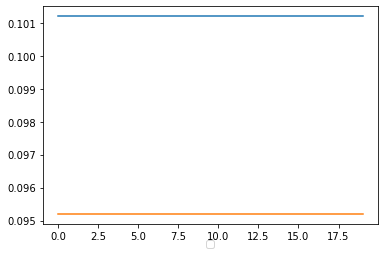

In [37]:
model.fit(x_train, y_train, epochs=20, batch_size=500, shuffle=True, validation_split=0.2)
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.show()

In [35]:
model.fit(x_train, y_train, epochs=50, batch_size=1000, shuffle=True)

Epoch 1/50
50/50 [==============================] - 5s 102ms/step - loss: 0.5585 - accuracy: 0.8398
Epoch 2/50
50/50 [==============================] - 5s 107ms/step - loss: 0.4978 - accuracy: 0.8549
Epoch 3/50
50/50 [==============================] - 5s 104ms/step - loss: 0.4691 - accuracy: 0.8603
Epoch 4/50
50/50 [==============================] - 5s 104ms/step - loss: 0.4503 - accuracy: 0.8635
Epoch 5/50
50/50 [==============================] - 5s 108ms/step - loss: 0.4335 - accuracy: 0.8671
Epoch 6/50
50/50 [==============================] - 5s 104ms/step - loss: 0.4244 - accuracy: 0.8693
Epoch 7/50
50/50 [==============================] - 5s 106ms/step - loss: 0.4137 - accuracy: 0.8720
Epoch 8/50
50/50 [==============================] - 5s 106ms/step - loss: 0.4018 - accuracy: 0.8758
Epoch 9/50
50/50 [==============================] - 5s 101ms/step - loss: 0.3976 - accuracy: 0.8760
Epoch 10/50
50/50 [==============================] - 5s 100ms/step - loss: 0.3885 - accuracy: 0.8783

In [ ]:
tf.keras.models.save_model(model,"mymodel.h5")